<a href="https://colab.research.google.com/github/girlandred/data-engineering/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
import json
from sklearn.preprocessing import LabelBinarizer
import csv

In [3]:
import pandas as pd
import numpy as np

import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from tqdm import tqdm
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
# function to add to JSON
def write_json(new_data, filename='clients.json'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["clients"].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)
 
    # python object to be appended
maryna = {
      "id": "59761c23b30d971669fb42aa",
      "isActive": True,
      "age": 42,
      "name": "Maryna Shyta",
      "gender": "female",
      "company": "Agiliway",
      "email": "maryna.shyta@agiliway.com",
      "phone": "+1 (890) 543-2313",
      "address": "169 Pasichna Street, Lviv, 8551"
    }

david = {
      "id": "59761c23b30d971669fb42aa",
      "isActive": False,
      "age": 18,
      "name": "David Taran",
      "gender": "male",
      "company": "Yakasaka",
      "email": "david.pro2006@yakasaka.com",
      "phone": "+1 (890) 324-2313",
      "address": "169 Pasichna Street, Lviv, 8551"
    }

dmytro = {
      "id": "59761c23b30d971669fb42aa",
      "isActive": False,
      "age": 24,
      "name": "Dmytro Shevchenko",
      "gender": "male",
      "company": "UrbanPress",
      "email": "dmytro.shevchenko@urbanpress.com",
      "phone": "+1 (219) 543-2313",
      "address": "169 Pasichna Street, Lviv, 8551"
    }
     
write_json(maryna)
write_json(dmytro)
write_json(david)

In [5]:
with open('clients.json', 'r', encoding='utf-8') as json_file:
    data = json.loads(json_file.read())
    print(data)
    sum = 0
    count = 0
    for x in data['clients']:
        sum += x["age"]
        count += 1 
    print("\nMean age of employees: ", sum/count)
     
    print("\nEmails of the employees: \n")
    for i in data['clients']:
        print("Email:", i['email'])
        print()
    length = len(data['clients'])
    print(length)

{'clients': [{'id': '59761c23b30d971669fb42ff', 'isActive': True, 'age': 36, 'name': 'Dunlap Hubbard', 'gender': 'male', 'company': 'CEDWARD', 'email': 'dunlaphubbard@cedward.com', 'phone': '+1 (890) 543-2508', 'address': '169 Rutledge Street, Konterra, Northern Mariana Islands, 8551'}, {'id': '59761c233d8d0f92a6b0570d', 'isActive': True, 'age': 24, 'name': 'Kirsten Sellers', 'gender': 'female', 'company': 'EMERGENT', 'email': 'kirstensellers@emergent.com', 'phone': '+1 (831) 564-2190', 'address': '886 Gallatin Place, Fannett, Arkansas, 4656'}, {'id': '59761c23fcb6254b1a06dad5', 'isActive': True, 'age': 30, 'name': 'Acosta Robbins', 'gender': 'male', 'company': 'ORGANICA', 'email': 'acostarobbins@organica.com', 'phone': '+1 (882) 441-3367', 'address': '697 Linden Boulevard, Sattley, Idaho, 1035'}, {'id': '59761c23b30d971669fb42aa', 'isActive': True, 'age': 42, 'name': 'Maryna Shyta', 'gender': 'female', 'company': 'Agiliway', 'email': 'maryna.shyta@agiliway.com', 'phone': '+1 (890) 543

In [6]:
clients_data = data['clients'] 

# now we will open a file for writing
data_file = open('clients_data.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)
 
# Counter variable used for writing
# headers to the CSV file
count = 0
 
for client in clients_data:
    if count == 0:
 
        # Writing headers of CSV file
        header = client.keys()
        csv_writer.writerow(header)
        count += 1
 
    # Writing data of CSV file
    csv_writer.writerow(client.values())
 
data_file.close()

In [7]:
df = pd.read_csv('/content/clients_data.csv')
df.head(3)

,id,isActive,age,name,gender,company,email,phone,address
0,59761c23b30d971669fb42ff,True,36,Dunlap Hubbard,male,CEDWARD,dunlaphubbard@cedward.com,+1 (890) 543-2508,"169 Rutledge Street, Konterra, Northern Marian..."
1,59761c233d8d0f92a6b0570d,True,24,Kirsten Sellers,female,EMERGENT,kirstensellers@emergent.com,+1 (831) 564-2190,"886 Gallatin Place, Fannett, Arkansas, 4656"
2,59761c23fcb6254b1a06dad5,True,30,Acosta Robbins,male,ORGANICA,acostarobbins@organica.com,+1 (882) 441-3367,"697 Linden Boulevard, Sattley, Idaho, 1035"


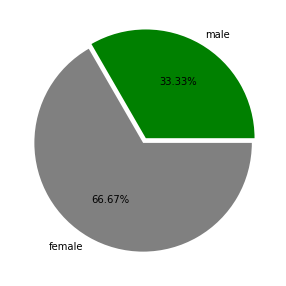

In [8]:
plt.figure(figsize=(10,5))
plt.pie(df['gender'].value_counts().sort_values(),labels=df['gender'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.show()

9
Index(['id', 'isActive', 'age', 'name', 'gender', 'company', 'email', 'phone',
       'address'],
      dtype='object')
male      6
female    3
Name: gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


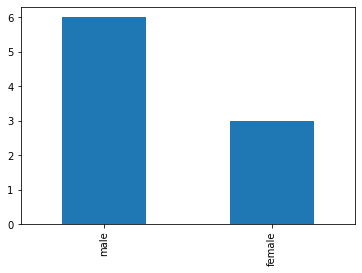

In [9]:
print(len(df))
print(df.columns)
print(df['gender'].value_counts())
print(df['gender'].value_counts().plot.bar())

In [10]:
df['gender'] = df['gender'].apply(lambda string: string.split(' '))
df

,id,isActive,age,name,gender,company,email,phone,address
0,59761c23b30d971669fb42ff,True,36,Dunlap Hubbard,[male],CEDWARD,dunlaphubbard@cedward.com,+1 (890) 543-2508,"169 Rutledge Street, Konterra, Northern Marian..."
1,59761c233d8d0f92a6b0570d,True,24,Kirsten Sellers,[female],EMERGENT,kirstensellers@emergent.com,+1 (831) 564-2190,"886 Gallatin Place, Fannett, Arkansas, 4656"
2,59761c23fcb6254b1a06dad5,True,30,Acosta Robbins,[male],ORGANICA,acostarobbins@organica.com,+1 (882) 441-3367,"697 Linden Boulevard, Sattley, Idaho, 1035"
3,59761c23b30d971669fb42aa,True,42,Maryna Shyta,[female],Agiliway,maryna.shyta@agiliway.com,+1 (890) 543-2313,"169 Pasichna Street, Lviv, 8551"
4,59761c23b30d971669fb42aa,True,24,Dmytro Shevchenko,[male],UrbanPress,dmytro.shevchenko@urbanpress.com,+1 (219) 543-2313,"169 Pasichna Street, Lviv, 8551"
5,59761c23b30d971669fb42aa,True,18,David Taran,[male],Yakasaka,david.pro2006@yakasaka.com,+1 (890) 324-2313,"169 Pasichna Street, Lviv, 8551"
6,59761c23b30d971669fb42aa,True,42,Maryna Shyta,[female],Agiliway,maryna.shyta@agiliway.com,+1 (890) 543-2313,"169 Pasichna Street, Lviv, 8551"
7,59761c23b30d971669fb42aa,False,24,Dmytro Shevchenko,[male],UrbanPress,dmytro.shevchenko@urbanpress.com,+1 (219) 543-2313,"169 Pasichna Street, Lviv, 8551"
8,59761c23b30d971669fb42aa,False,18,David Taran,[male],Yakasaka,david.pro2006@yakasaka.com,+1 (890) 324-2313,"169 Pasichna Street, Lviv, 8551"


Int64Index([0, 1], dtype='int64')
0    3
1    6
dtype: int64
[0, 1]


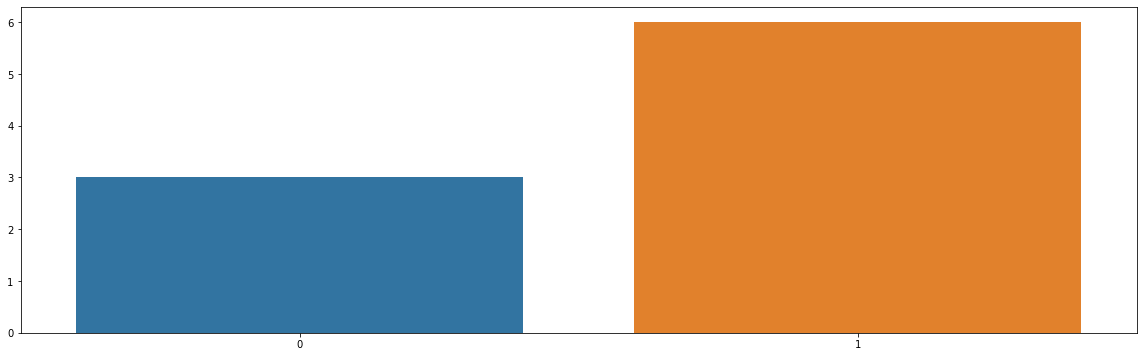

In [33]:
s = df['gender'].str.join(',').str.get_dummies(sep=',')
lb = LabelBinarizer()
trainx = pd.DataFrame(lb.fit_transform(s), columns=lb.classes_, index=df.index)
print(trainx.columns)
print(trainx.sum())

labels = list(trainx.sum().keys())
print(labels)
label_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= labels, y= label_counts, ax=ax)

In [32]:
dummy_activity = pd.get_dummies(list(df['isActive']))
print(dummy_activity)

dummy_gender = df['gender'].str.join(',').str.get_dummies(sep=',')
print(dummy_gender)

dummy_company = df['company'].str.join('').str.get_dummies(sep=',')
print(dummy_company)

   False  True
0      0     1
1      0     1
2      0     1
3      0     1
4      0     1
5      0     1
6      0     1
7      1     0
8      1     0
   female  male
0       0     1
1       1     0
2       0     1
3       1     0
4       0     1
5       0     1
6       1     0
7       0     1
8       0     1
   Agiliway  CEDWARD  EMERGENT  ORGANICA  UrbanPress  Yakasaka
0         0        1         0         0           0         0
1         0        0         1         0           0         0
2         0        0         0         1           0         0
3         1        0         0         0           0         0
4         0        0         0         0           1         0
5         0        0         0         0           0         1
6         1        0         0         0           0         0
7         0        0         0         0           1         0
8         0        0         0         0           0         1


In [26]:
inner_joined_cols = pd.concat([dummy_activity, dummy_gender, dummy_company], axis="columns", join="inner")

In [30]:
pd.DataFrame(data=inner_joined_cols)

,False,True,female,male,Agiliway,CEDWARD,EMERGENT,ORGANICA,UrbanPress,Yakasaka
0,0,1,0,1,0,1,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0,1,0
5,0,1,0,1,0,0,0,0,0,1
6,0,1,1,0,1,0,0,0,0,0
7,1,0,0,1,0,0,0,0,1,0
8,1,0,0,1,0,0,0,0,0,1
